In [51]:
import pandas as pd
import numpy as np

In [52]:
data = pd.read_csv("../cleanData/data_text_cluster_right.csv")

In [53]:
from collections import Counter
Counter(data.label.values)

Counter({'2016-11': 298, '2017-2': 167, '2016-12': 139, '2017-1': 224})

In [54]:
data["new_label"] = data.label.apply(lambda x: x[:4])

In [65]:
data

,Unnamed: 0,abbas,ability,able,absolutely,accept,accepted,access,according,accumulation,...,written,wrong,year,yes,yesterday,york,young,zero,label,new_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-11,2016
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017-2,2017
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-12,2016
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-12,2016
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016-11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,823,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017-1,2017
824,824,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017-1,2017
825,825,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017-1,2017
826,826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2017-1,2017


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:-2],data["new_label"],test_size=0.3,random_state=0)

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 25)

tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.622


In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model1 = plot_tree(tree, filled=True, label='all', feature_names = X_train.columns.to_list())
entropy = model.tree_.impurity

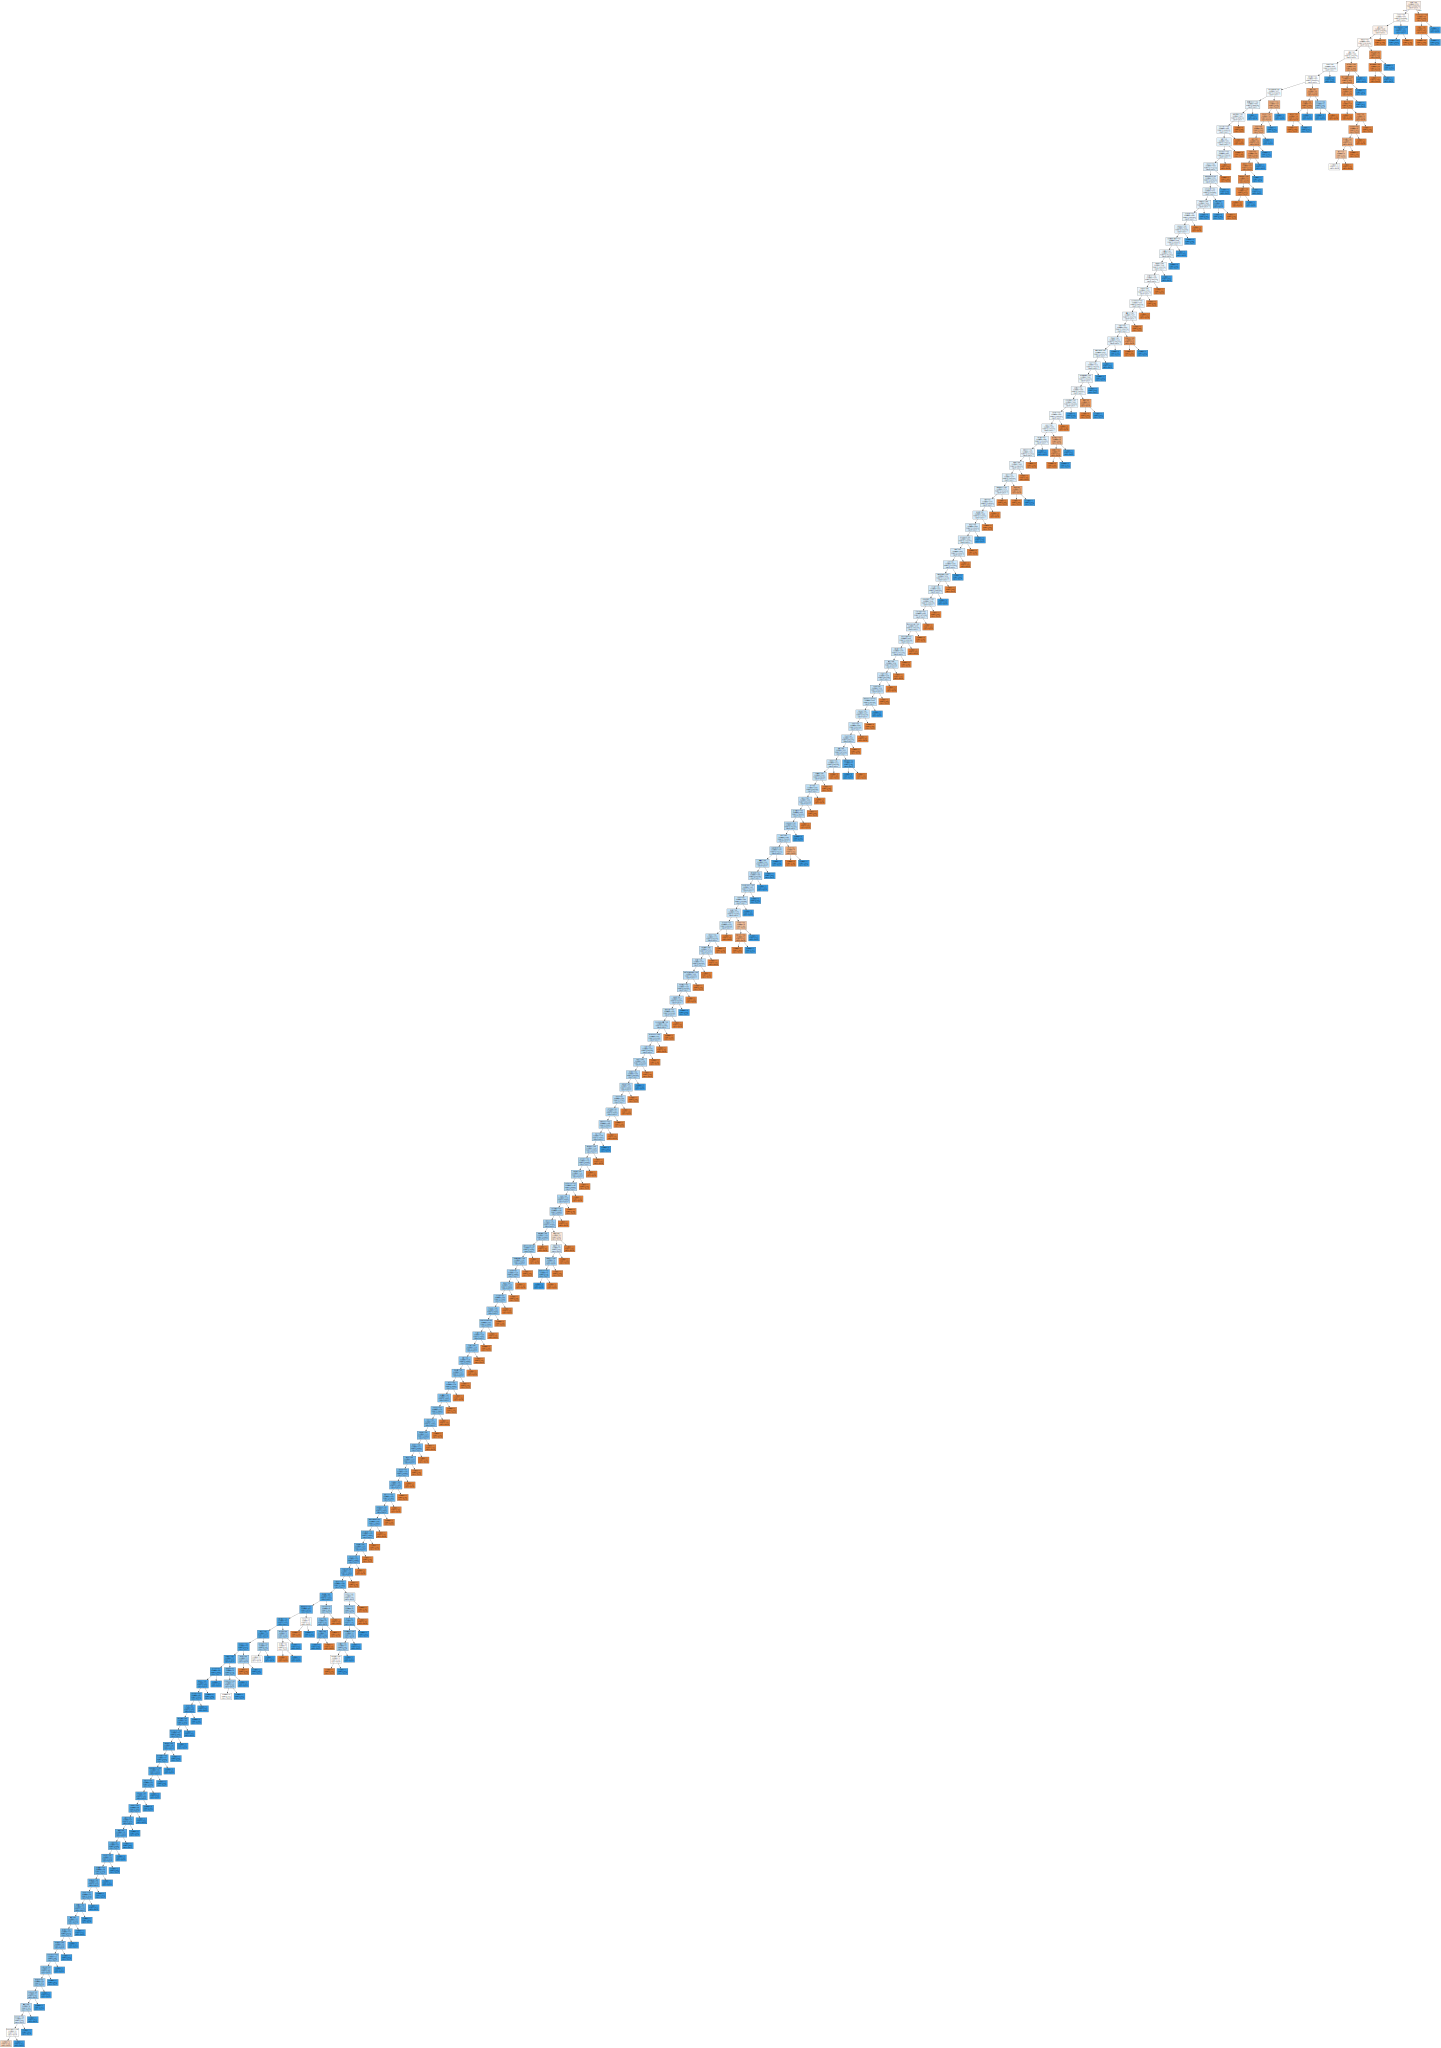

In [59]:
import graphviz

with open("/Users/junjiexie/Documents/gu校内生活/501/501dataProject/DecisionTree/tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [60]:
feature_df = pd.DataFrame([X_train.columns, tree.feature_importances_]).T

In [61]:
feature_df.columns = ["feature_name","feature_value"]
visual_df = feature_df.sort_values("feature_value",ascending=False)[:30]

In [62]:
visual_df

,feature_name,feature_value
1461,vote,0.045808
489,fake,0.036408
782,let,0.021104
1473,watch,0.020154
727,join,0.016496
79,ban,0.015266
423,election,0.013803
1018,president,0.013035
1340,thanks,0.011767
1465,wa,0.011093


In [63]:
import plotly.express as px
fig = px.bar(visual_df, x='feature_name', y='feature_value')
fig.show()

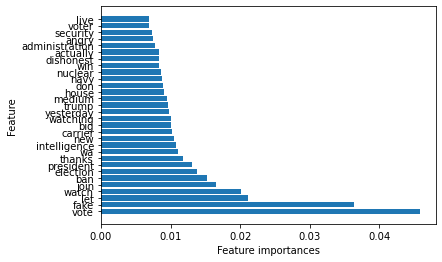

In [64]:
from matplotlib import pyplot as plt

def plot_feature_importances(model):
    n_features = visual_df.index
    plt.barh(visual_df["feature_name"], visual_df["feature_value"], align='center')
    # plt.yticks(n_features, X_train.columns)
    plt.xlabel("Feature importances")
    plt.ylabel("Feature")

plot_feature_importances(tree)